# Unitary Decompositions
## Examples of application of methods

#### Importing relevant functions, assuming 'scripts' folder is in the same directory as the folder in which this notebook finds itself

In [1]:
import sys, pathlib, random
from pathlib import Path
parent_path = Path(sys.path[0]).parent.absolute()
scripts_path = str(parent_path)+'\scripts'

sys.path.insert(1, scripts_path)
from unitary_decompositions import *
from useful_computing_methods import *
from useful_maths_methods import *
from useful_physics_methods import *

#### Permutations of qubits

##### All-to-all connectivity, following disjoint-cycles method in Sec. 4.3.2 of Bruno Murta's Ph.D. dissertation, resulting in depth of at most 2 SWAPs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[8, 4, 7, 0, 9, 2, 5, 3, 6, 1]


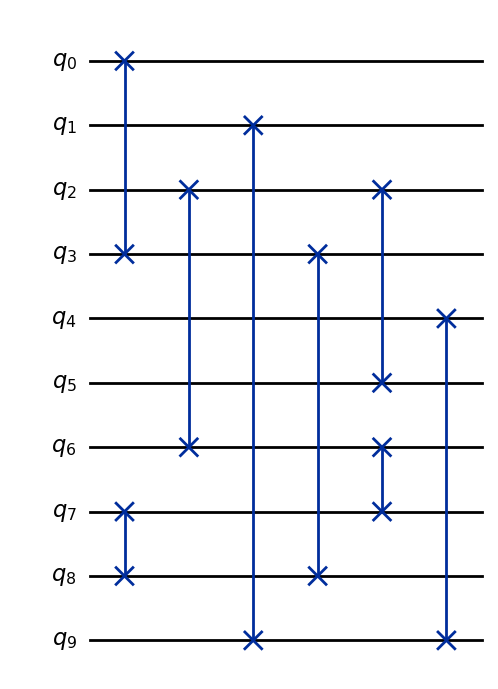

In [2]:
# Number of qubits
n_perm_all = 10

# Generating a random permutation
permutation_list_all = list(np.random.permutation(n_perm_all))

# Quantum circuit that realizes desired permutation of qubits
qc_perm_all = permutation_qcircuit(permutation_list_all, connectivity='all')

# Initial ordering of qubits (default)
print(list(range(n_perm_all)))

# Expected final ordering of qubits (after permutation)
print(permutation_list_all)

# Drawing quantum circuit
qc_perm_all.draw('mpl')

##### Linear connectivity, following Amida lottery method in K. Seki, T. Shirakawa, and S. Yunoki, [Phys. Rev. A 101, 052340](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.101.052340)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[8, 4, 7, 0, 9, 2, 5, 3, 6, 1]


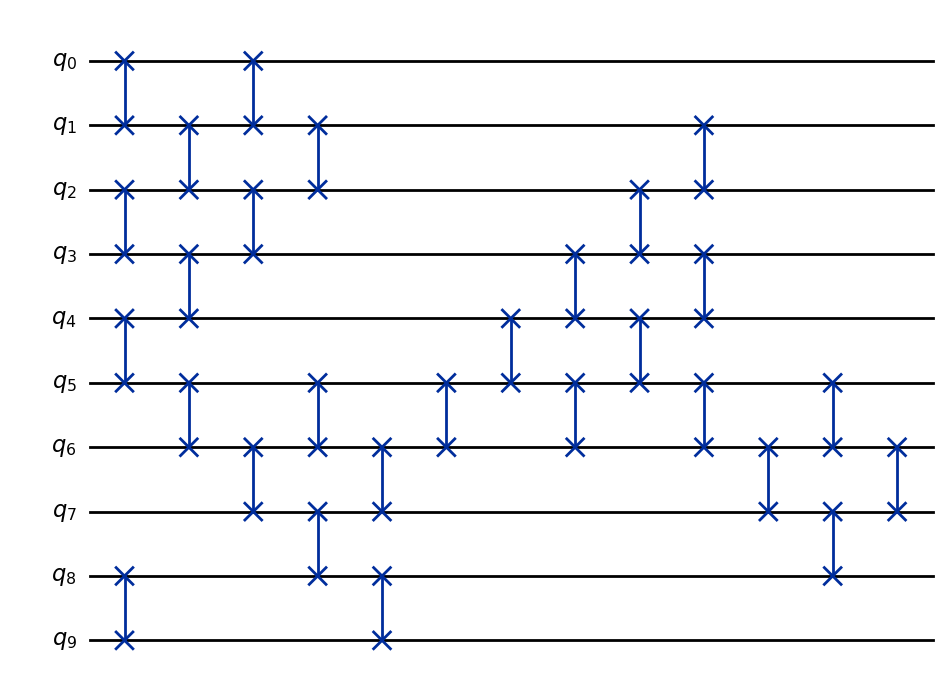

In [3]:
# # Number of qubits
# n_perm_lin = 10

# # Generating a random permutation
# permutation_list_lin = list(np.random.permutation(n_perm_lin))

# Using same permutation as in all-to-all case above for comparison
permutation_list_lin = permutation_list_all

# Quantum circuit that realizes desired permutation of qubits
qc_perm_lin = permutation_qcircuit(permutation_list_lin, connectivity='lin')

# Initial ordering of qubits (default)
print(list(range(n_perm_all)))

# Expected final ordering of qubits (after permutation)
print(permutation_list_all)

# Drawing quantum circuit
qc_perm_lin.draw('mpl')

#### Long-range CNOT with linear connectivity

Follows Sec. III of P. M. Q. Cruz and B. Murta, [APL Quantum 1, 016105 (2024)](https://doi.org/10.1063/5.0187026)

Matrix representations coincide:  True
[Circuit depth, CNOT count]:  [17, 40]


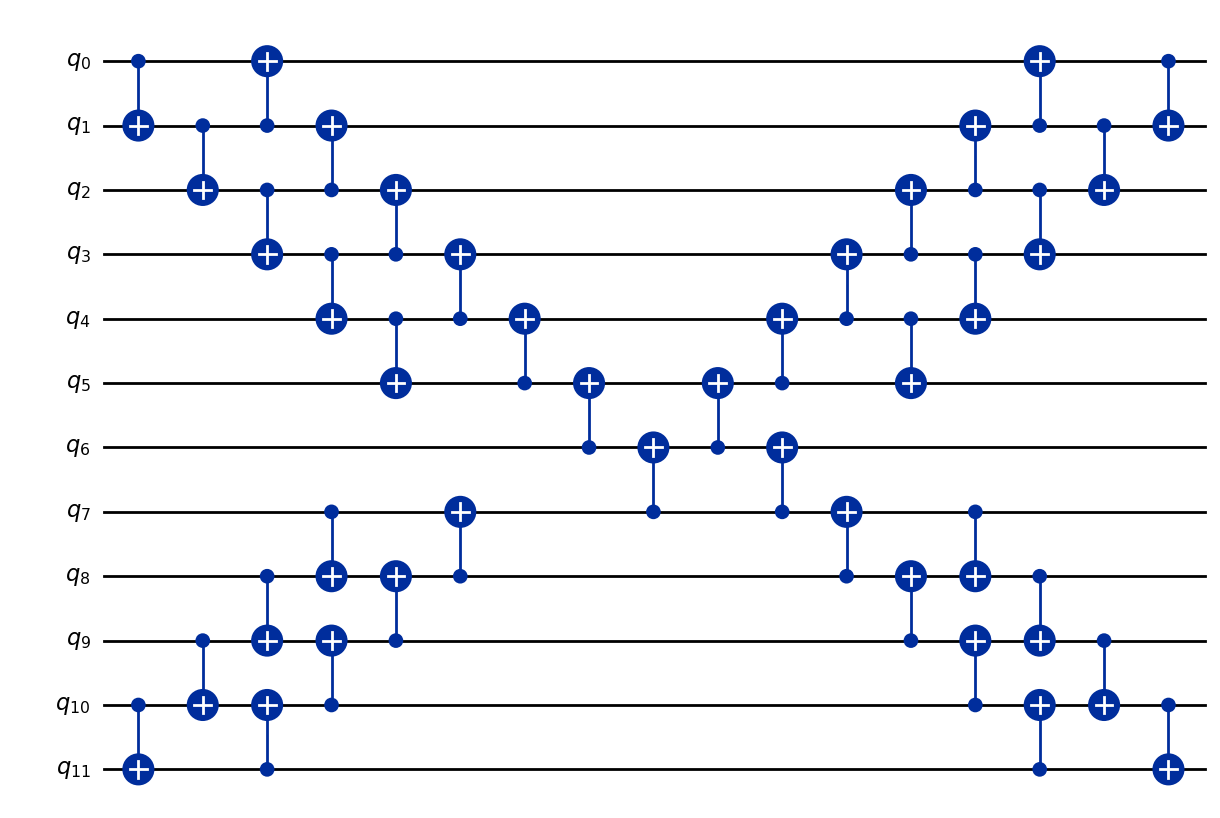

In [4]:
# Number of idle qubits between pair of active qubits
n_lrcnot = 10

# Order of control and target
# 'ct' if control (target) is most (least) significant, 'tc' otherwise
order_lrcnot = 'ct'

# Quantum circuit that ignores linear qubit connectivity constraints for comparison
qc_lrcnot_ref = QuantumCircuit(n_lrcnot+2)
if order_lrcnot == 'ct':
    qc_lrcnot_ref.cx(n_lrcnot+1,0)
else:
    qc_lrcnot_ref.cx(0,n_lrcnot+1)
qc_lrcnot_ref_matrix = unitary_rep_qcircuit(qc_lrcnot_ref)

# Quantum circuit that realizes long-range CNOT with CNOTs between adjacent qubits only
qc_lrcnot_decomp = long_range_CNOT_lin_con(n_lrcnot, order_lrcnot)
qc_lrcnot_matrix = unitary_rep_qcircuit(qc_lrcnot_decomp)

# Sanity check: Confirming that two matrix representations coincide
print('Matrix representations coincide: ', np.allclose(qc_lrcnot_matrix, qc_lrcnot_ref_matrix))

# Circuit depth and CNOT count of decomposed circuit using Qiskit transpile with basis (U3, CNOT)
print('[Circuit depth, CNOT count]: ', depth_and_CNOT_count_qcircuit(qc_lrcnot_decomp))

# Drawing quantum circuit with linear qubit connectivity constraints
qc_lrcnot_decomp.draw('mpl')

#### Long-range Toffoli gate with linear connectivity
Follows Sec. III of P. M. Q. Cruz and B. Murta, [APL Quantum 1, 016105 (2024)](https://doi.org/10.1063/5.0187026)

Qubit trio order:  cct
Number of idle qubits:  (7, 3)
Matrix representations coincide:  True
[Circuit depth, CNOT count]:  [25, 54]


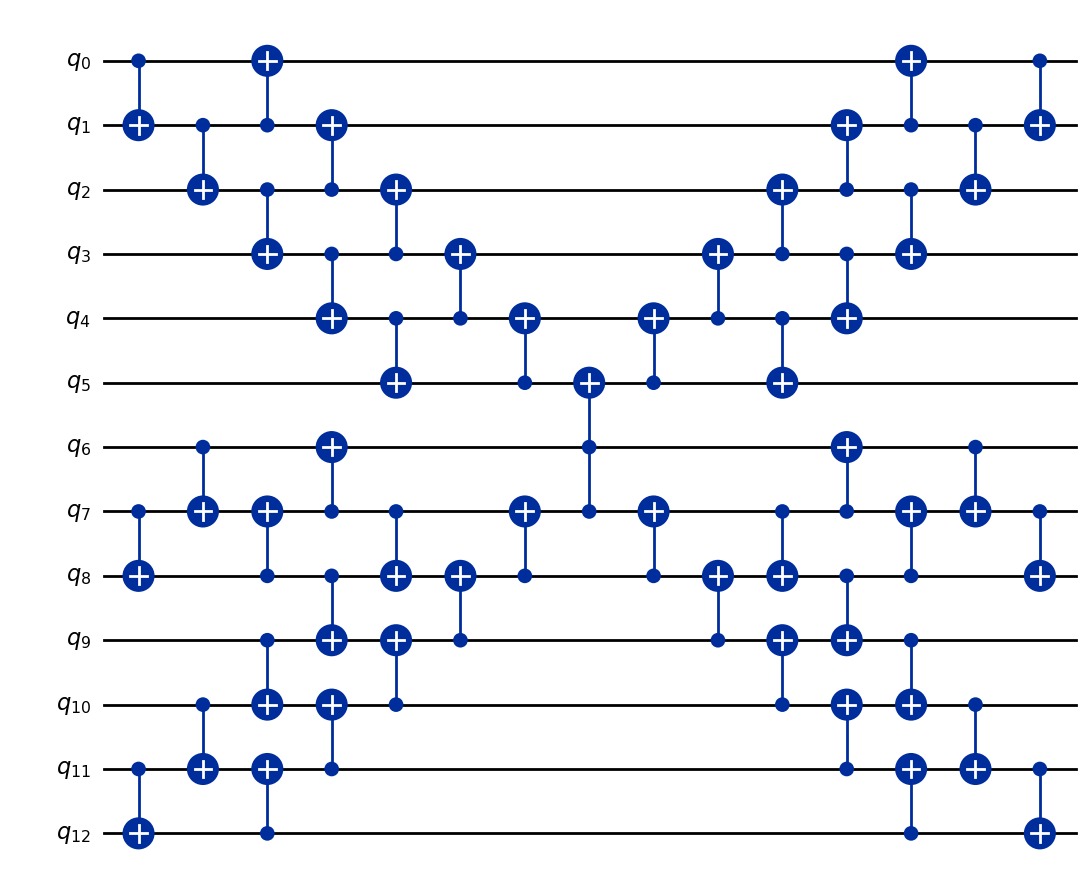

In [5]:
# Toffoli gate acting on qubit trio (n2t + n1t + 2, n1t + 1, 0)
n1t = random.randint(0,10)
n2t = random.randint(0,10-n1t)

# order_lrt can take values:
# 'cct': target-qubit is qubit 0 (i.e., least significant).
# 'ctc': target-qubit is n1t + 1.
# 'tcc': target-qubit is n2t + n1t + 2 (i.e., most significant)
options_t = ['cct', 'ctc', 'tcc']
order_lrt = options_t[random.randint(0,2)]

# Printing description of Toffoli gate
print('Qubit trio order: ', order_lrt)
print('Number of idle qubits: ', (n1t, n2t))

# Minimization target:
# 'count': CNOT count.
# 'depth': Circuit depth.
min_metric_t = 'depth'

# Quantum circuit that ignores linear qubit connectivity constraints for comparison
qc_lrt_ref = QuantumCircuit(n1t+n2t+3)
if order_lrt == 'cct':
    qc_lrt_ref.ccx(n1t+n2t+2,n1t+1,0)
elif order_lrt == 'ctc':
    qc_lrt_ref.ccx(n1t+n2t+2,0,n1t+1)
else:
    qc_lrt_ref.ccx(0,n1t+1,n1t+n2t+2)
qc_lrt_ref_matrix = unitary_rep_qcircuit(qc_lrt_ref)

# Quantum circuit that realizes long-range Toffoli with CNOTs between adjacent qubits only
qc_lrt_decomp = long_range_Toffoli_lin_con(n1t, n2t, order_lrt, min_metric_t)
qc_lrt_matrix = unitary_rep_qcircuit(qc_lrt_decomp)

# Sanity check: Confirming that two matrix representations coincide
print('Matrix representations coincide: ', np.allclose(qc_lrt_matrix, qc_lrt_ref_matrix))

# Circuit depth and CNOT count of decomposed circuit using Qiskit transpile with basis (U3, CNOT)
print('[Circuit depth, CNOT count]: ', depth_and_CNOT_count_qcircuit(qc_lrt_decomp))

# Drawing quantum circuit with linear qubit connectivity constraints
qc_lrt_decomp.draw('mpl')

#### Long-range Fredkin gate with linear connectivity
Follows Sec. III of P. M. Q. Cruz and B. Murta, [APL Quantum 1, 016105 (2024)](https://doi.org/10.1063/5.0187026)

Qubit trio order:  ctt
Number of idle qubits:  (5, 0)
Matrix representations coincide:  True
[Circuit depth, CNOT count]:  [32, 49]


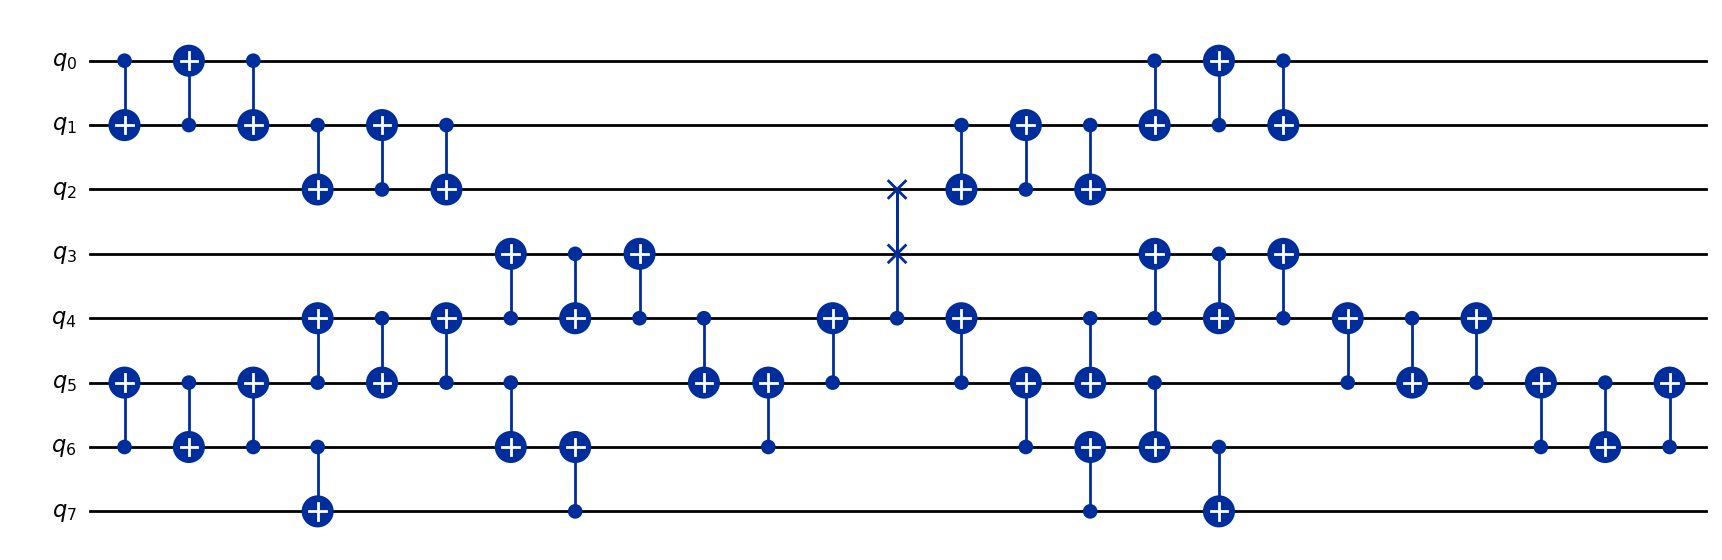

In [6]:
# Fredkin gate acting on qubit trio (n2t + n1t + 2, n1t + 1, 0)
n1f = random.randint(0,10)
n2f = random.randint(0,10-n1f)

# order_lrf can take values:
# 'ctt': control-qubit is qubit n2t + n1t + 2 (i.e., most significant).
# 'tct': control-qubit is n1t + 1.
# 'ttc': control-qubit is 0 (i.e., least significant)
options_f = ['ctt', 'tct', 'ttc']
order_lrf = options_f[random.randint(0,2)]

# Printing description of Fredkin gate
print('Qubit trio order: ', order_lrf)
print('Number of idle qubits: ', (n1f, n2f))

# Minimization target:
# 'count': CNOT count.
# 'depth': Circuit depth.
min_metric_f = 'depth'

# Quantum circuit that ignores linear qubit connectivity constraints for comparison
qc_lrf_ref = QuantumCircuit(n1f+n2f+3)
if order_lrf == 'ctt':
    qc_lrf_ref.cswap(n1f+n2f+2,n1f+1,0)
elif order_lrf == 'ttc':
    qc_lrf_ref.cswap(0,n2f+n1f+2,n1f+1)
else:
    qc_lrf_ref.cswap(n1f+1,n2f+n1f+2,0)
qc_lrf_ref_matrix = unitary_rep_qcircuit(qc_lrf_ref)

# Quantum circuit that realizes long-range Fredkin with CNOTs between adjacent qubits only
qc_lrf_decomp = long_range_Fredkin_lin_con(n1f, n2f, order_lrf, min_metric_f)
qc_lrf_matrix = unitary_rep_qcircuit(qc_lrf_decomp)

# Sanity check: Confirming that two matrix representations coincide
print('Matrix representations coincide: ', np.allclose(qc_lrf_matrix, qc_lrf_ref_matrix))

# Circuit depth and CNOT count of decomposed circuit using Qiskit transpile with basis (U3, CNOT)
print('[Circuit depth, CNOT count]: ', depth_and_CNOT_count_qcircuit(qc_lrf_decomp))

# Drawing quantum circuit with linear qubit connectivity constraints
qc_lrf_decomp.draw('mpl')

#### Multiplexor gate (i.e., direct sum of Rz or Ry gates)
Follows Theorems 4 and 8 from V. V. Shende, S. S. Bullock and I. L. Markov, [IEEE Trans. on Computer-Aided Design 25, 1000 (2006)](https://ieeexplore.ieee.org/document/1629135)

True
[Circuit depth, CNOT count]:  [64, 32]


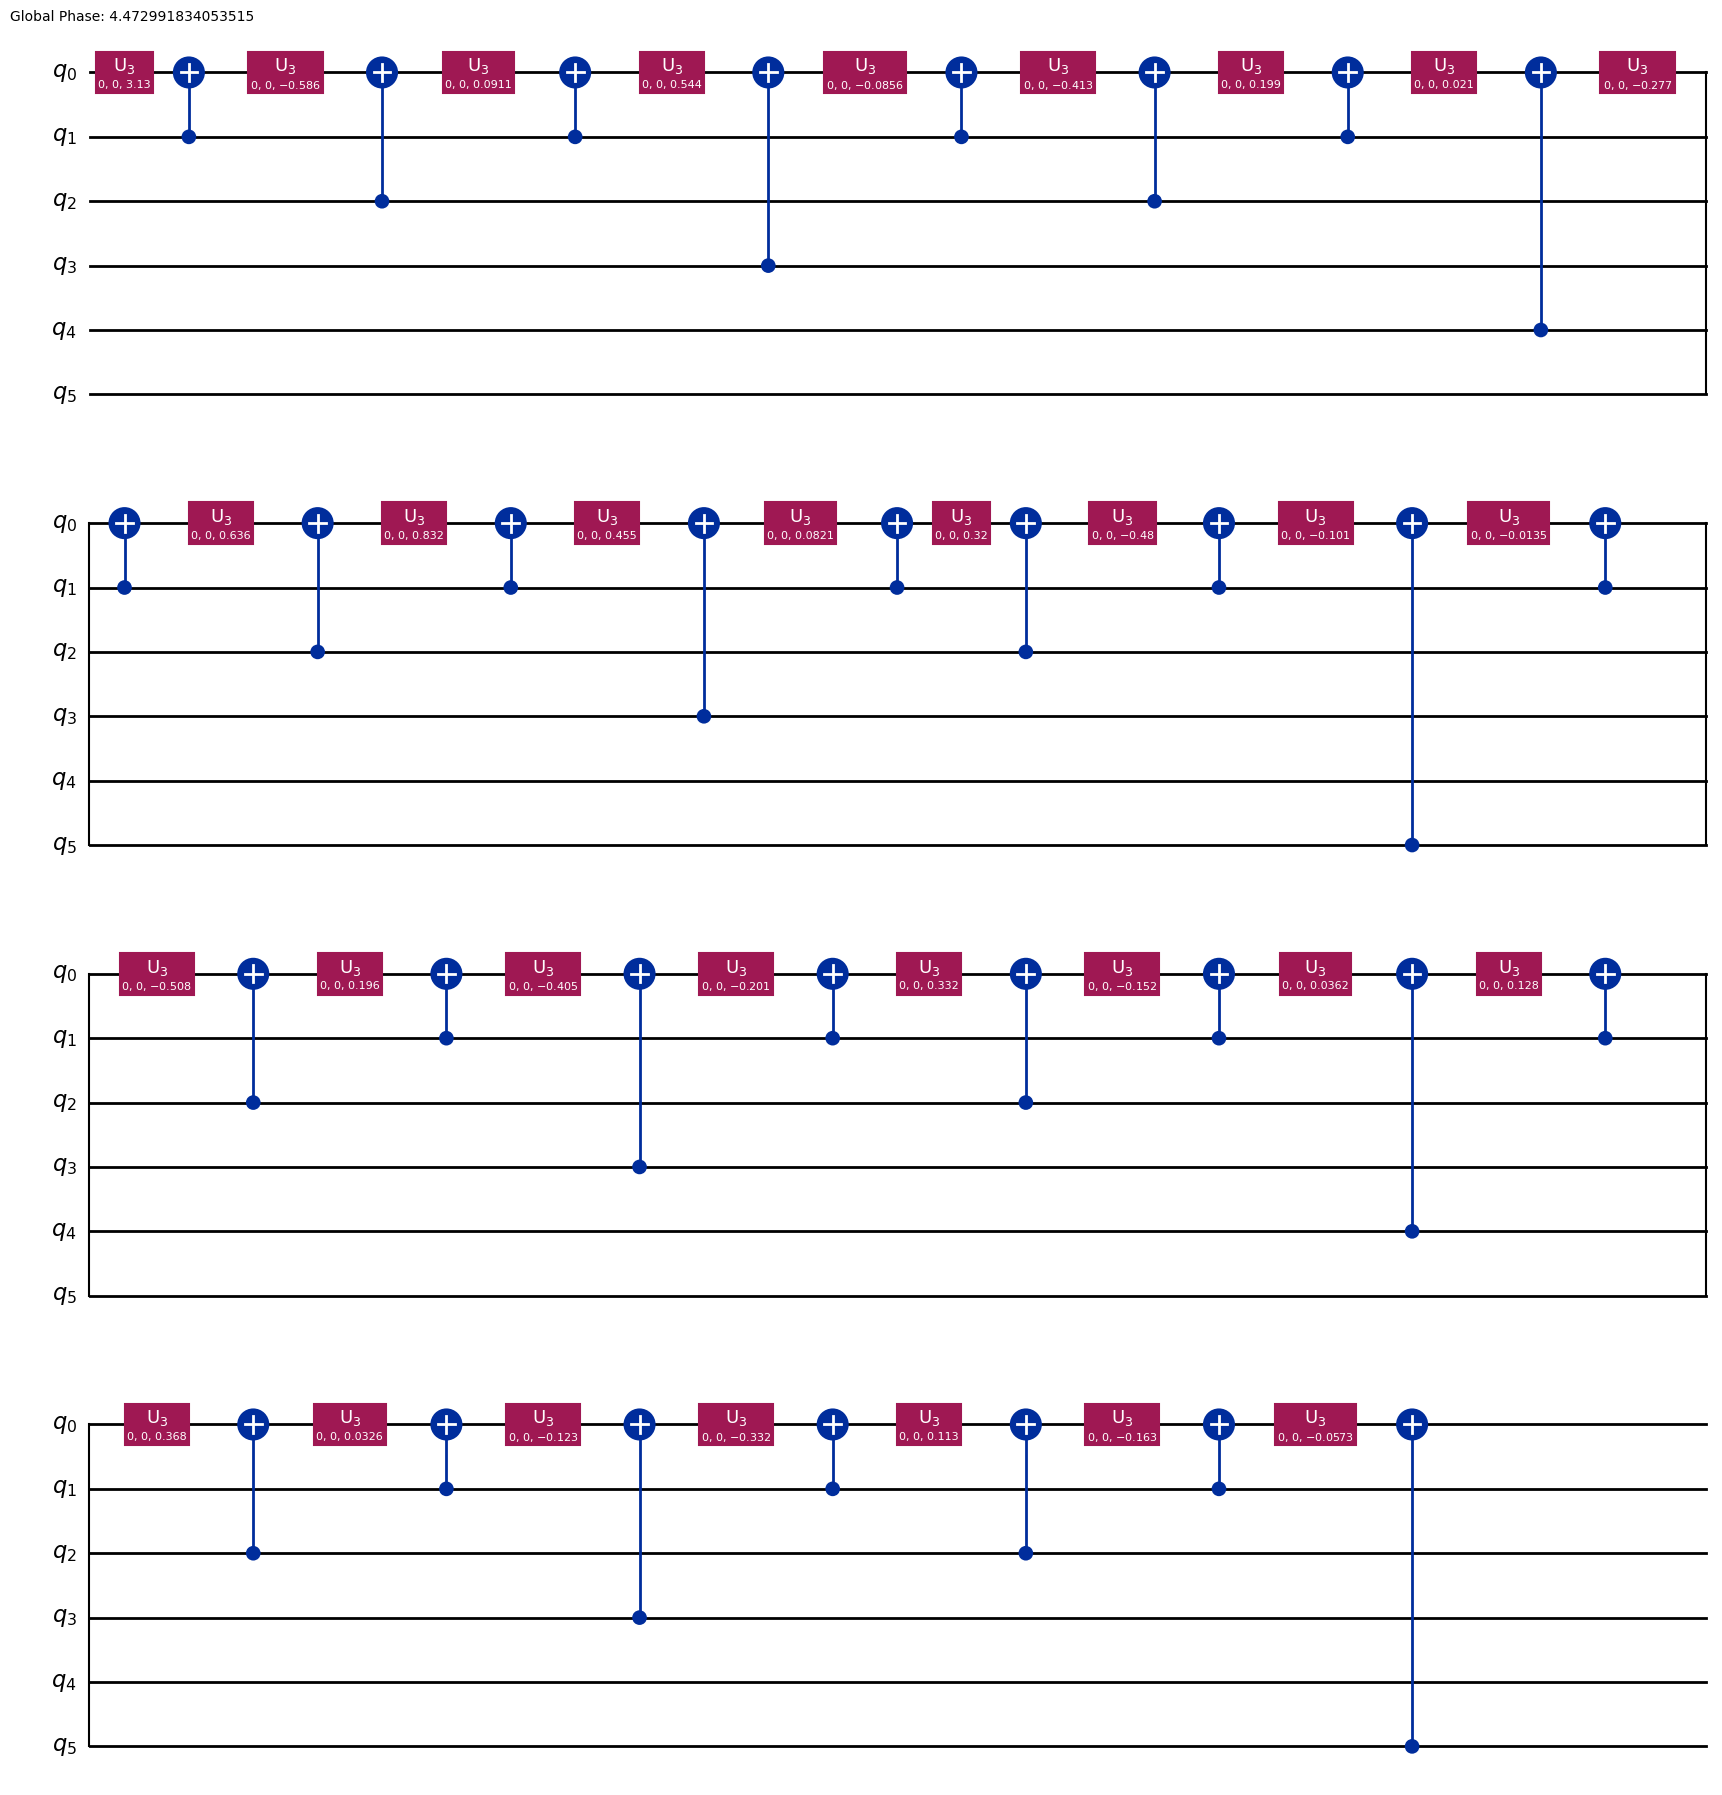

In [7]:
# Defining parameters of multiplexor gate
gate_label_ops = ['z', 'y']
gate_label = gate_label_ops[random.randint(0,1)]
n_mpx = 6
params = []
for i in range(2**(n_mpx-1)):
    params.append(random.random()*2*np.pi)

# Generating expected matrix representation for sanity check
exec('ref_matrix = r'+gate_label+'_matrix(params[0])')
for i in range(1,2**(n_mpx-1)):
    exec('ref_matrix = direct_sum(ref_matrix, r'+gate_label+'_matrix(params[i]))')

# Generating quantum circuit and corresponding matrix representation
qc_mpx = multiplexor_basis_gate_decomp(gate_label, params, n_mpx)
qc_mpx_matrix  = unitary_rep_qcircuit(qc_mpx, gauge=False)

# Confirming circuit yields expected matrix representation
print(np.allclose(qc_mpx_matrix, ref_matrix))

# Circuit depth and CNOT count of decomposed circuit using Qiskit transpile with basis (U3, CNOT)
qc_mpx_metrics, qc_mpx_decomp = depth_and_CNOT_count_qcircuit(qc_mpx, output_circuit=True)
print('[Circuit depth, CNOT count]: ', qc_mpx_metrics)

# Drawing quantum circuit
qc_mpx_decomp.draw('mpl')

#### Converting multi-spin-$\frac{1}{2}$ state into half-filled fermionic version assuming Jordan-Wigner transformation 
Follows Sec. III of B. Murta and J. Fernández-Rossier, [Phys. Rev. B 109, 035128 (2024)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.109.035128)

In [8]:
# Functions to generate random multi-spin-1/2 states for sanity checks

def random_spin_wf_generator(N):
    """
    Function that generates 2^N-dim vector corresponding to
    arbitrary N-spin-1/2 wave function. Returns both the vector
    and a quantum circuit to prepare it.
    """
    
    U = qiskit.quantum_info.random_unitary(int(2**N)).data
    psi = U[:,0]
    
    q = QuantumRegister(N)
    qc = QuantumCircuit(q)
    qc.initialize(psi, q[:])
    
    return psi, qc

def random_spin_wf_generator_Sz_total_good_quantum_number(N, Sz_total):
    """
    Function that generates 2^N-dim vector corresponding to
    arbitrary N-spin-1/2 wave function with Sz as good quantum
    number, i.e., all basis states with nonzero amplitude have
    N_up = N//2+Sz_total spins-up and N_down = N - N_up spins-down.
    Returns both the vector and a quantum circuit to prepare it.
    """
    
    basis = spin_basis_1d(N,pauli=False,Nup=N//2+Sz_total)
    basis_size = basis.Ns

    if basis_size > 1:
        U = qiskit.quantum_info.random_unitary(basis_size).data
        phi = U[:,0]
    
        psi = np.zeros((2**N,), dtype=complex)
        for i in range(basis_size):
            psi[basis[i]] = phi[i]
    else:
        psi = np.zeros((2**N,), dtype=complex)
        if Sz_total > 0:
            # All spins up
            psi[0] = 1
        else:
            # All spins down
            psi[2**N-1] = 1
    
    q = QuantumRegister(N)
    qc = QuantumCircuit(q)
    qc.initialize(psi, q[:])
    
    return psi, qc

0.9999999999999989


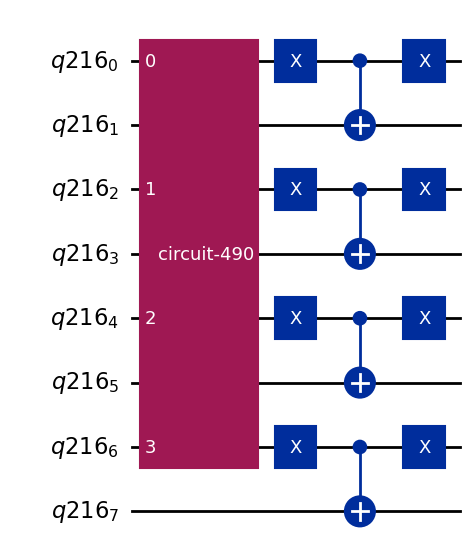

In [43]:
# Using random N-spin-1/2 wave function
N = 4
order = 'site'
connectivity = 'all'
psi_spin, qc_spin = random_spin_wf_generator(N)
psi_fermion = spin_to_fermion_converter_by_hand(psi_spin, N, order=order)
qc_fermion_output, qc_fermion = fermionic_version_of_spin_wave_function(qc_spin, N, order, False, connectivity)
print(fidelity(psi_fermion, qc_fermion_output))
qc_fermion.draw('mpl')

1.0000000000000004


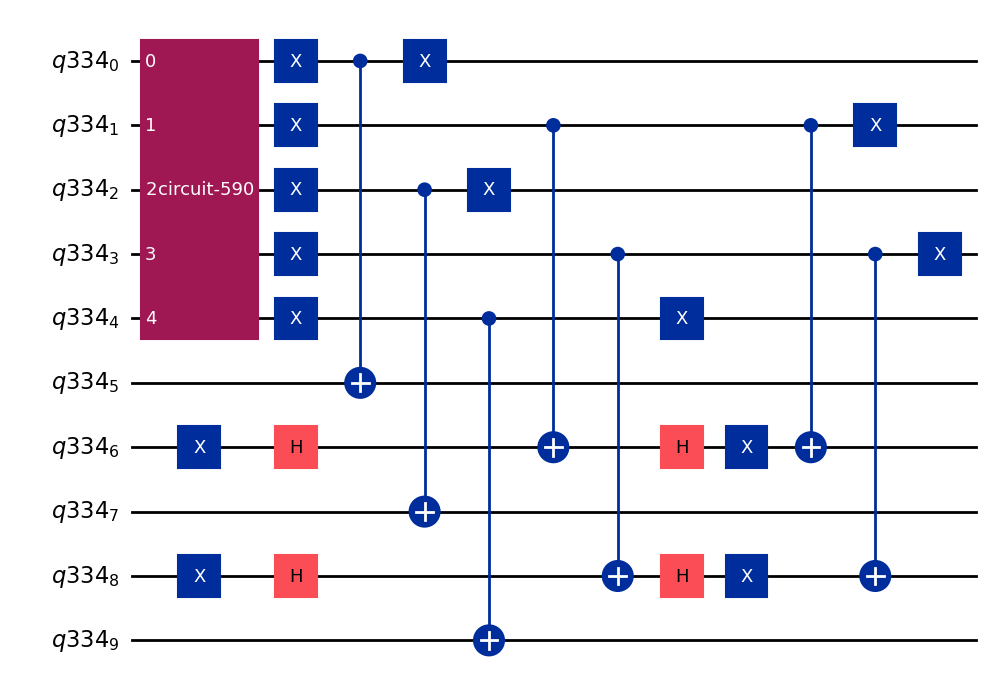

In [63]:
# Using random N-spin-1/2 wave function with Sz as good quantum number
N = 5
order = 'spin'
connectivity = 'all'
Sz = random.randint(-N//2,N-N//2)
psi_spin, qc_spin = random_spin_wf_generator_Sz_total_good_quantum_number(N, Sz)
psi_fermion = spin_to_fermion_converter_by_hand(psi_spin, N, order=order)
qc_fermion_output, qc_fermion = fermionic_version_of_spin_wave_function(qc_spin, N, order, True, connectivity)
print(fidelity(psi_fermion, qc_fermion_output))
qc_fermion.draw('mpl')